## Perceptron algorithm in plain Python

The perceptron is a simple supervised machine learning algorithm and one of the earliest **neural network** architectures. It was introduced by Rosenblatt in the late 1950s. A perceptron represents a **binary linear classifier** that maps a set of training examples (of $d$ dimensional input vectors) onto binary output values using a $d-1$ dimensional hyperplane.

The perceptron as follows.

**Given:** 
- dataset $\{(\boldsymbol{x}^{(1)}, y^{(1)}), ..., (\boldsymbol{x}^{(m)}, y^{(m)})\}$
- with $\boldsymbol{x}^{(i)}$ being a $d-$dimensional vector $\boldsymbol{x}^i = (x^{(i)}_1, ..., x^{(i)}_d)$
- $y^{(i)}$ being a binary target variable, $y^{(i)} \in \{0,1\}$

The perceptron is a very simple neural network:
- it has a real-valued weight vector $\boldsymbol{w}= (w^{(1)}, ..., w^{(d)})$
- it has a real-valued bias $b$
- it uses the Heaviside step function as its activation function

* * *
A perceptron is trained using **gradient descent**. The training algorithm has different steps. In the beginning (step 0) the model parameters are initialized. The other steps (see below) are repeated for a specified number of training iterations or until the parameters have converged.

**Step 0: ** Initialize the weight vector and bias with zeros (or small random values).
* * *

**Step 1: ** Compute a linear combination of the input features and weights. This can be done in one step for all training examples, using vectorization and broadcasting:
$\boldsymbol{a} = \boldsymbol{X} \cdot \boldsymbol{w} + b$

where $\boldsymbol{X}$ is a matrix of shape $(n_{samples}, n_{features})$ that holds all training examples, and $\cdot$ denotes the dot product.
* * *

**Step 2: ** Apply the Heaviside function, which returns binary values:

$\hat{y}^{(i)} = 1 \, if \, a^{(i)} \geq 0, \, else \, 0$
* * *

** Step 3: ** Compute the weight updates using the perceptron learning rule

\begin{equation}
\Delta \boldsymbol{w} = \eta \, \boldsymbol{X}^T \cdot \big(\boldsymbol{\hat{y}} - \boldsymbol{y} \big)
\end{equation}
$$ \Delta b = \eta \, \big(\boldsymbol{\hat{y}} - \boldsymbol{y} \big) $$

where $\eta$ is the learning rate.
* * *

** Step 4: ** Update the weights and bias

\begin{equation}
\boldsymbol{w} = \boldsymbol{w} + \Delta \boldsymbol{w}
\end{equation}

$$
b = b  + \Delta b
$$

In [18]:
import numpy as np
import matplotlib.pyplot as plt

class Perceptron:
    
    def predict(self, X):
        return (np.dot(self.add_bias(X), self.weights) >= 0) * 1
    
    def fit(self, X, y, itr=1000, lr=0.0001):
        X = self.add_bias(X)
        self.weights = np.zeros(X.shape[1])
        for _ in range(itr): 
            self.weights += lr * np.dot((y - self.predict(X[:,1:])), X)
            
    def add_bias(self,X):
        return np.insert(X, 0, np.ones(X.shape[0]), axis=1)

In [2]:
def plot_hyperplane(X, y, weights, bias):
    """
    Plots the dataset and the estimated decision hyperplane
    """
    slope = - weights[0]/weights[1]
    intercept = - bias/weights[1]
    x_hyperplane = np.linspace(-10,10,10)
    y_hyperplane = slope * x_hyperplane + intercept
    fig = plt.figure(figsize=(8,6))
    plt.scatter(X[:,0], X[:,1], c=y)
    plt.plot(x_hyperplane, y_hyperplane, '-')
    plt.title("Dataset and fitted decision hyperplane")
    plt.xlabel("First feature")
    plt.ylabel("Second feature")
    plt.show()

In [3]:
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score
X, y = load_digits(return_X_y=True)
clf = Perceptron()
clf.fit(X, (y==9)*1)
pre = clf.predict(X)
accuracy_score((y==9)*1, pre) # Predicting 9 

0.9922092376182526

In [4]:
# This will handle any type of binary target int or categorical
class Perceptron2:

    def predict(self, X):
        X = self.add_bias(X)
        convert_to_class = lambda c: self.classes[1] if c >= 0 else self.classes[0]
        return np.vectorize(convert_to_class)(X.dot(self.weights))
    
    def fit(self, X, y, epochs=1000, lr=0.001):
        self.classes = np.unique(y)
        X = self.add_bias(X)
        y = (y == self.classes[1]) * 1
        self.weights = np.zeros(X.shape[1])
        for _ in range(epochs): 
            self.weights += lr * np.dot((y - self.predict(X[:,1:])), X)
            
    def add_bias(self,X):
        return np.insert(X, 0, np.ones(X.shape[0]), axis=1)

In [5]:
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score
X, y = load_digits(return_X_y=True)
clf = Perceptron2()
clf.fit(X, (y==9)*1)
pre = clf.predict(X)
accuracy_score((y==9)*1, pre) # Predicting 9 

0.9922092376182526

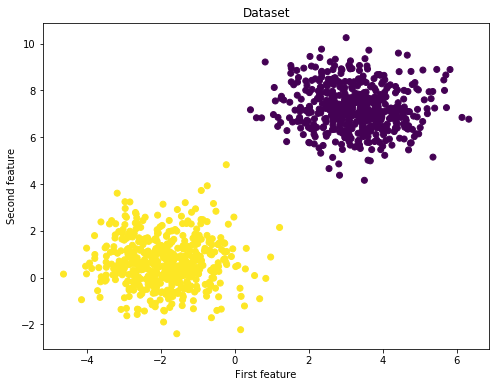

In [6]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

X, y = make_blobs(n_samples=1000, centers=2)
fig = plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y)
plt.title("Dataset")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
p = Perceptron()
p.fit(X_train, y_train)
y_p_train = p.predict(X_train)
y_p_test = p.predict(X_test)
print("training accuracy: {} %".format(100 - np.mean(np.abs(y_p_train - y_train)) * 100))
print("test accuracy: {} %".format(100 - np.mean(np.abs(y_p_test - y_test)) * 100))

training accuracy: 100.0 %
test accuracy: 100.0 %


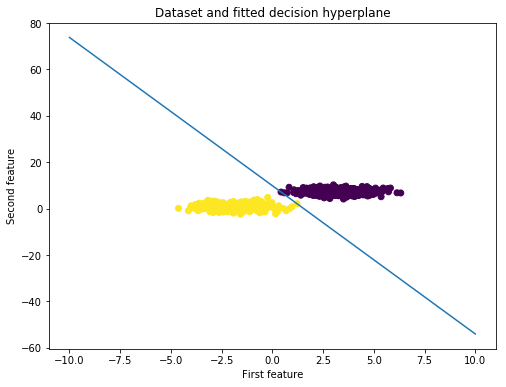

In [20]:
plot_hyperplane(X, y, p.weights[1:], p.weights[0])